<h1>
    <b>
    Solve 2BV problem:
    </b>
    
</h1>

<!-- <font size="4"> -->
$$   
 \begin{equation}    
    p\frac{d^2y}{dx^2} = y - S\mbox{,}
 \end{equation}
$$  
where $p$ and $S$ are constants.
    
Boundary conditions:
    
 $$
 \text{at}\quad x = x_1: \quad \alpha \, y'(x) + \beta \, y(x) = \gamma \mbox{,} 
 $$
    
 $$
 \text{at}\quad x = x_N: \quad \alpha_1 \, y'(x) + \beta_1 \, y(x) = \gamma_1 \mbox{.} 
 $$

<!-- </font> -->


In [1]:
# import Pkg;
# Pkg.add("Plots");

using Plots



50×50 Array{Float32,2}:
    -1.0     -0.0      0.0      0.0  …      0.0      0.0      0.0      0.0
 -2401.0   4803.0  -2401.0      0.0         0.0      0.0      0.0      0.0
     0.0  -2401.0   4803.0  -2401.0         0.0      0.0      0.0      0.0
     0.0      0.0  -2401.0   4803.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0  -2401.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0  …      0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0  …      0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
     0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
 

xGrid = range(0.0, 1; length = Nd) = 0.0:0.02040816326530612:1.0


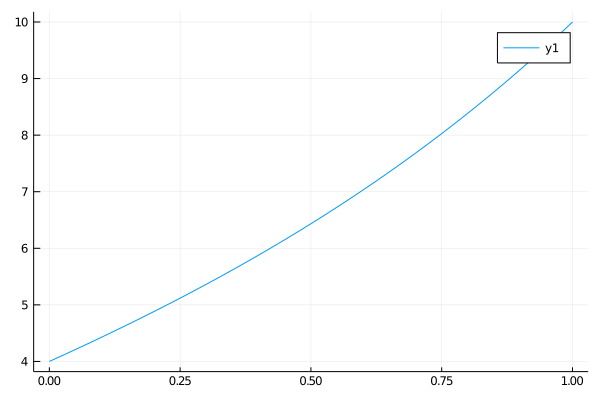

In [19]:


Nn = 1; # ν - N bins 
Nd = 50; # x - bins 

@show xGrid = range(0., 1; length = Nd)


# xr = circshift(xGrid, -1)
# xr[end] = 2xr[end-1]-xr[end-2]
# @show xr
# @show xGridOneHalf = 0.5(xGrid + xr)
# @show dxGrid = xr - xGrid
# xsh = circshift(xGrid, 1)
# xsh[1] = 2xsh[2]-xsh[3]
# @show xsh

Nmat = Nd*Nn
Mat = zeros(Float32, Nmat, Nmat)

Rhs = zeros(Float32, Nmat) #right side

let

alph = 0.
bet = 1.
gam = 4.

alph1 = 0.
bet1 = 1.
gam1 = 10.

Sd = 2.

p=1.


for i = 1:Nmat
    for i = 1:Nmat

        iSubMatRaw = div(i + Nn-1, Nn)         

        if iSubMatRaw == 1 
            Rhs[i] = -gam                   
        elseif iSubMatRaw == Nd 
            Rhs[i] = gam1
        else
            Rhs[i] = Sd
        end
                
        
        for j = 1:Nmat
                               
       
        jSubMatCol = div(j + Nn-1, Nn)
        
        iloc = i - Nn * (iSubMatRaw-1)        
        jloc = j - Nn * (jSubMatCol-1)
        
        if iSubMatRaw == 1 #left BC    

            
            dx_i = xGrid[2]-xGrid[1]
            dx_im05 = dx_i 
            dx_ip05 = dx_i        
            fPar = [dx_im05, dx_i, dx_ip05, 1]
                       
            if jSubMatCol == 1
                B1 = -bet + alph/dx_ip05
                
                Mat[i,j] = iloc==jloc ? B1 : 0 #only diag    
                
            elseif jSubMatCol == 2
                
                C1 = -alph/dx_ip05
                
                Mat[i,j] = iloc==jloc ? C1 : 0
                                
            end                        
            
        elseif iSubMatRaw > 1 && iSubMatRaw < Nd
#           the main body of the matrix
                
            dx_i = xGrid[iSubMatRaw+1]-xGrid[iSubMatRaw]
            dx_im05 = dx_i 
            dx_ip05 = dx_i
                
                if iSubMatRaw == jSubMatCol  && iloc==jloc
                    B = 1 + ((1/dx_im05 + 1/dx_ip05)*p)/dx_i
                    Mat[i,j] = B
                elseif iSubMatRaw == jSubMatCol+1 && iloc==jloc                     
                    A =  -p /(dx_i*dx_im05)                     
                    Mat[i,j] = A                    
                elseif iSubMatRaw == jSubMatCol-1                    
                    C=-(p/(dx_i*dx_ip05))                                        
                    Mat[i,j] = C
                else                                        
                    Mat[i,j] = 0                                                        
                end
                        

        elseif iSubMatRaw == Nd #right BC                
            dx_i = xGrid[Nd]-xGrid[Nd-1]
            dx_im05 = dx_i 
            dx_ip05 = dx_i
            
            if jSubMatCol == Nd-1
                
                AN = -(alph1/dx_im05)
                
                Mat[i,j] = iloc==jloc ? AN : 0

            elseif jSubMatCol == Nd
                
                BN = bet1 + alph1/dx_im05
                
                Mat[i,j] = iloc==jloc ? BN : 0
                
            end
                                                        
        end
        
        end
        
        
    end
end

end

display(Mat)
# display(Rhs)
# @show Rhs
Mat_inv = inv(Mat)
# Mat_inv*Mat

ytestNumeric1 = Mat_inv*Rhs


plot(xGrid, ytestNumeric1)

<h1>
Analytical solution:
</h1>


\begin{equation}
 p \,y''(x) = y(x) - S
\end{equation}

\begin{eqnarray}
a_0 y'(x_0) + b_0 y(x_0)&=&  g_0,\\
a_1 y'(x_1) + b_1 y(x_1)&=&  g_1,
\end{eqnarray}




The solution on the interval: $[ x_0, x_1 ]$:

$$
y(x)=
\frac{2 e^{\frac{\text{x0}+\text{x1}}{\sqrt{p}}} \left(\sqrt{p} \left(S
   (\text{a0} \text{b1}-\text{a1} \text{b0}) \cosh
   \left(\frac{\text{x0}-\text{x1}}{\sqrt{p}}\right)+\text{a0}
   (\text{g1}-\text{b1} S) \cosh
   \left(\frac{x-\text{x0}}{\sqrt{p}}\right)+\text{a1} (\text{b0}
   S-\text{g0}) \cosh \left(\frac{x-\text{x1}}{\sqrt{p}}\right)\right)+S
   \sinh \left(\frac{\text{x0}-\text{x1}}{\sqrt{p}}\right) (\text{b0}
   \text{b1} p-\text{a0} \text{a1})+\text{b1} p (\text{g0}-\text{b0} S)
   \sinh \left(\frac{x-\text{x1}}{\sqrt{p}}\right)+\text{b0} p (\text{b1}
   S-\text{g1}) \sinh
   \left(\frac{x-\text{x0}}{\sqrt{p}}\right)\right)}{e^{\frac{2
   \text{x0}}{\sqrt{p}}} \left(\text{a0}+\text{b0} \sqrt{p}\right)
   \left(\text{b1} \sqrt{p}-\text{a1}\right)+e^{\frac{2
   \text{x1}}{\sqrt{p}}} \left(\text{a0}-\text{b0} \sqrt{p}\right)
   \left(\text{a1}+\text{b1} \sqrt{p}\right)}
$$

  0.046372 seconds (100.37 k allocations: 5.054 MiB)
  0.075125 seconds (145.94 k allocations: 7.465 MiB)


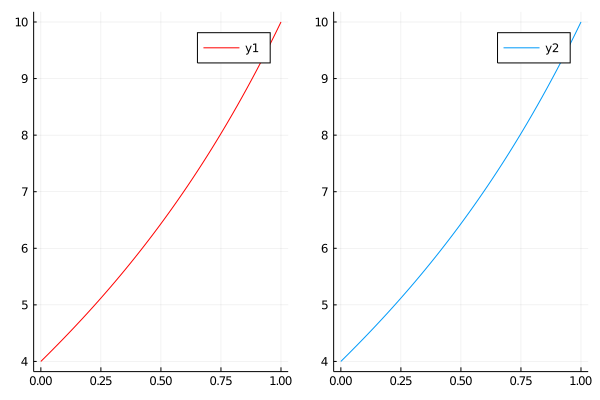

In [18]:
function test_sol2bvp1(x::Float64; S::Float64,x0::Float64,x1::Float64,p::Float64,
        a0::Float64,b0::Float64,g0::Float64,a1::Float64,b1::Float64,g1::Float64)
    
     sol::Float64 = (2*exp((x0 + x1)/sqrt(p))*
      (sqrt(p)*(a0*(g1 - b1*S)*cosh((x - x0)/sqrt(p)) + 
     a1*(-g0 + b0*S)*cosh((x - x1)/sqrt(p)) + 
     (-(a1*b0) + a0*b1)*S*cosh((x0 - x1)/sqrt(p))) + 
     b0*p*(-g1 + b1*S)*sinh((x - x0)/sqrt(p)) + 
     b1*p*(g0 - b0*S)*sinh((x - x1)/sqrt(p)) + 
     (-(a0*a1) + b0*b1*p)*S*sinh((x0 - x1)/sqrt(p))))/
     (exp((2*x0)/sqrt(p))*(a0 + b0*sqrt(p))*(-a1 + b1*sqrt(p)) + 
     exp((2*x1)/sqrt(p))*(a0 - b0*sqrt(p))*(a1 + b1*sqrt(p)))
    
    return(sol)
   
end

function test_sol2bvp2(x; S, x0 ,x1 ,p ,
        a0, b0,g0 ,a1 ,b1 ,g1 )
    
     sol= (2*exp((x0 + x1)/sqrt(p))*
      (sqrt(p)*(a0*(g1 - b1*S)*cosh((x - x0)/sqrt(p)) + 
     a1*(-g0 + b0*S)*cosh((x - x1)/sqrt(p)) + 
     (-(a1*b0) + a0*b1)*S*cosh((x0 - x1)/sqrt(p))) + 
     b0*p*(-g1 + b1*S)*sinh((x - x0)/sqrt(p)) + 
     b1*p*(g0 - b0*S)*sinh((x - x1)/sqrt(p)) + 
     (-(a0*a1) + b0*b1*p)*S*sinh((x0 - x1)/sqrt(p))))/
     (exp((2*x0)/sqrt(p))*(a0 + b0*sqrt(p))*(-a1 + b1*sqrt(p)) + 
     exp((2*x1)/sqrt(p))*(a0 - b0*sqrt(p))*(a1 + b1*sqrt(p)))
    
    return(sol)
   
end



@time ytest=[test_sol2bvp1(xGrid[i]; S=2., x0=0., x1=1., p=1.,
              a0=0.,b0=1.,g0=4.,
              a1=0.,b1=1.,g1=10.) for i in 1:xGrid.len]              

@time ytest=[test_sol2bvp2(xGrid[i]; S=2., x0=0., x1=1., p=1.,
              a0=0.,b0=1.,g0=4.,
              a1=0.,b1=1.,g1=10.) for i in 1:xGrid.len]              


plt = plot(layout = (1, 2))

plot!(plt[1],xGrid, ytest, linecolor=:red)
plot!(plt[2],xGrid, ytestNumeric1)


In [24]:
function AMatCoef_im1(i,j,pars)
    
    dtim05,dti,dtip05,mu = pars
    k1=mu
    
    k = 1;  # BC related
    
    if i == Nd
        A = k/dtim05
    else
        A = k1^2/(dti*dtim05)
    end
    
    A = i==j ? A : 0
    
    return(A)
end

function BMatCoef_i(i,j,pars)
            
    C= dtim05,dti,dtip05,mu = pars

    k1 = 1. #BC related param
    
    if i == 1
        
        B = 1 + k1/dtip05
            
        
    else
    
        
        B = 1 + ((1/dtim05 + 1/dtip05)*k1^2)/dti
    end
    
    B = i==j ? B : 0    
    
#     println(B," ",i, "  ",j)
    
    return(B)
end

function CMatCoef_ip1(i,j,pars)
    
    dtim05,dti,dtip05,mu = pars
    k1=mu

    if i == 1
        C = k1/dtip05
        
#         C = 2 + dtip05^2/(2.*k1)
        
    else
        C = k1^2/(dti*dtip05)
    end
    
    C = i==j ? C : 0
    
    return(C)
end    

function RhsVector(i,pars)
    dtim05,dti,dtip05,mu = pars
    k=mu
    
    S = 1
    return(S)
end


RhsVector (generic function with 1 method)

<h2>
Carlson angular discretization
</h2>